# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_context('paper',font_scale=2)#font_scale=2 set fontsize doulble the size of default
sns.set_style('white')

df = pd.read_csv('data/human_body_temperature.csv')

# Overview of the data

In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [22]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# Is the distribution of body temperatures normal?

## Histogram
We plot histgrams to visualize the sample data's distribution. 

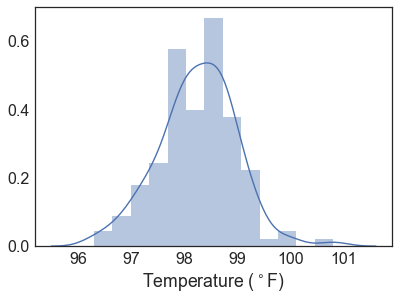

In [56]:
#histogram of temperature
sns.distplot(df.temperature,norm_hist=True);
plt.xlabel('Temperature ($^\circ$F)');

It doesn't look like a perfect bell-shaped curve as a normal distribution would have especially the right tail is slightly skewed. It's hard to tell from the histogram whether the distribution of the temperature is normal.

## CDF plot
We draw random data from a normal distribution with the same mean, standard deviation and the same size as that of the temperature data. We compare the CDF plot of the temperature data and that of the theoretical data of a normal distribution.

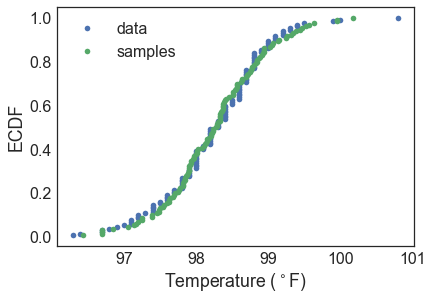

In [24]:
#Define a cumulative distribution function for a one-dimensional array of measurements.


import numpy as np
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

x,y=ecdf(df.temperature)
plt.plot(x,y,marker='o',linestyle='none')


#draw samples from normal distribution 
#with the same mean and std and size as that of df.temperature 
mu=np.mean(df.temperature)
sigma=np.std(df.temperature)
np.random.seed(6)
samples=np.random.normal(mu,sigma,size=len(df))


x_theory,y_theory=ecdf(samples)
plt.plot(x_theory,y_theory,marker='o',linestyle='none')

plt.xlabel('Temperature ($^\circ$F)')
plt.ylabel('ECDF')
plt.legend(('data','samples'),loc='best');



The theoretical CDF (cumulative distribution function) and the ECDF (empirical cumulative distribution function) of the data suggest that temperature is normally distributed.

## Plot Quantiles

goodness fit: 0.99


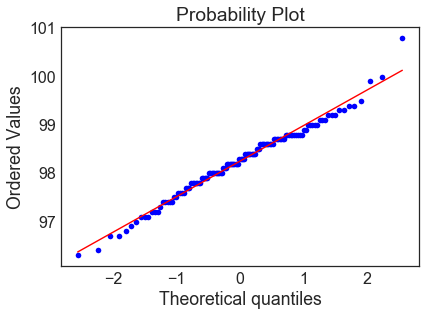

In [25]:
from scipy import stats
_,fit=stats.probplot(df.temperature,dist=stats.norm,plot=plt)
print('goodness fit:', '%.2f' %fit[2])

The linearity of the points suggests that the temperature data are normally distributed.

## normaltest()
We use the normaltest() to check for normality. The function tests whether the sample data comes from a normal distribution. Since the pvalue=0.26 much larger than 0.05, we can't reject that the sample fits a normal distribution. So the distribution of temperature is approximately a normal distribution.

In [26]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

# Is the sample size large? Are the observations independent?

In [27]:
df.shape

(130, 3)

In [30]:
df.gender.value_counts()
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

Since there are 130 individual observations, it is much larger than 30(CLT requires that a large sample size and as a rule of thumb: x>=30). Since there are equal number of males as females, the sample is not biased by gender. One person's temperature is not dependent on another's so the observations are independent. If sampling without replacement, n=130<10% of the population, the observations can be considered as independent. 

# Is the true population mean really 98.6$^{\circ}$F?

## Bootstrap hypothesis test
Null hypothesis: the true population mean of the temperature is 98.6$^{\circ}$F<br>
Alternative hypothesis: the true population mean is not 98.6$^{\circ}$F

In [32]:
#define a function to calcute the difference between mean of the data from mu
def diff_from_mu(data, val=mu):
    diff = np.mean(data)-val

    return diff


#define a function to draw bootstrap replicates
def draw_bs_reps(data, func, size=1):

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] =func(np.random.choice(data,len(data)))

    return bs_replicates

In [33]:
#null hypothesis
mu=98.6

#shift the temperature so that its mean is 98.6
temp_shifted=df.temperature-np.mean(df.temperature)+mu

#calculating the test statistic
diff=diff_from_mu(df.temperature) 

#Generate 10,000 bootstrap replicates, values of the test satistic computed from a bootstrap sample.
bs_replicates=draw_bs_reps(temp_shifted,diff_from_mu,10000)

#Calcuate p-value as the fraction of bs replicates that are less than the observed test statistic.
p_value=np.sum(bs_replicates<=diff)/10000
print('p_value: ',p_value)


p_value:  0.0


We use 'less than' because the mean of temperature was lower than 98.6$^{\circ}$F. We get a p-value much smaller than 0.05, suggesting that the true mean of temperature is statistically significantly different from 98.6$^{\circ}$F.

## Frequentist statistical testing
Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?

The question is whether the true population mean temperature is 98.6$^{\circ}$F. So there is only one group, regardless of gender. We use a one-sample test. We don't know the standard deviation of the population, but we know the sample standard deviation. Since the sample is of large size (n>30), we can use z statistic. 

Since the null hyothesis is that the true poopulation mean is 98.6$^{\circ}$F, the alternative hypotheis is either the true mean is larger than or less than 98.6$^{\circ}$F. We use a two-tailed test. Assuming the significance level is 0.05, if z-statistic is in the range of [-1.96,1.96] we can't reject the null hypothesis; otherwise we reject the null hypothesis and accept the alternative hypothesis.

### z-test

In [20]:
xbar=np.mean(df.temperature)
sigma=np.std(df.temperature)/np.sqrt(len(df.temperature))
z_score=(xbar-98.6)/sigma
print('z score: ',z_score)

p=stats.norm.sf(abs(z_score))*2
print('p value: ',p)

z score:  -5.475925202078116
p value:  4.3523151658821886e-08


Since z_score=-5.48 is much smaller than -1.96 and p values is much smaller than 0.05, we reject the null hypothesis. The true population mean of the temperature is not 98.6$^{\circ}$F.

### t-test
In case of large sample size(130>30), t test is expected to be very similar to the Z-test.

In [4]:
t,p=stats.ttest_1samp(df.temperature,98.6)
print('t statistic: ', t)
print('p value: ',p)

t statistic:  -5.4548232923645195
p value:  2.4106320415561276e-07


p value of t test is larger than that of z test, but still much smaller than 0.05, we get the same conclution as that of z-test, i.e., the true population mean of the temperature is not 98.6$^{\circ}$F.

# Draw a small sample of size 10 from the data and repeat both frequentist tests.
  <li>Which one is the correct one to use?
 <li>What do you notice? What does this tell you about the difference in application of the  t
  and  z statistic?

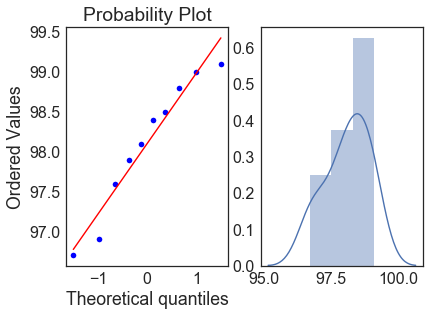

In [34]:
#draw samples
np.random.seed(456)
sample=np.random.choice(df.temperature, size=10)

plt.subplot(121)
stats.probplot(sample,dist=stats.norm,plot=plt)

plt.subplot(122)
sns.distplot(sample,norm_hist=True);


The figure shows that the current sample data isn't quite normally distributed.

In [35]:
#t-test
t,p=stats.ttest_1samp(sample,98.6)
print('t statistic: ', t)
print('p value: ',p)

#z-test
z=(np.mean(sample)-98.6)/(np.std(sample)/np.sqrt(10))
p=stats.norm.sf(abs(z))*2
print('\n')
print('z statistic: ', z)
print('p value: ',p)

t statistic:  -1.8988863132818794
p value:  0.09004829006314735


z statistic:  -2.001601922563594
p value:  0.045327562077971624


P-value of z test is much smaller than thatn of a t-test. In this case, the t test will fail to reject the null hypothesis but the z test will reject the null hypotheis. So with the same data but different test, we might reach different conclusions. If we apply a wrong test, we will end up with an incorrect conclusion. When the sample size is less than 30, t test should be used.

# At what temperature should we consider someone's temperature to be "abnormal"?
<li>As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
<li>Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [53]:
# bootstrap approach
np.random.seed(123)
bs_replicates=draw_bs_reps(df.temperature, np.mean, size=10000)
margin_error=1.96*np.std(bs_replicates)#/np.sqrt(10000)
mean_bs=bs_replicates.mean()

#bs_ci = np.percentile(bs_replicates,[2.5,97.5]) 
print('bootstrap mean temperature: ',mean_bs)
print('bootstrap 95% confidence interval:',mean_bs+np.array([-1,1])*margin_error)

bootstrap mean temperature:  98.24939223076925
bootstrap 95% confidence interval: [98.12287706 98.37590741]


With a bootstrap approach, the mean temperature is 98.25$^{\circ}$F. We are 95% confident that human temperature on average can be as low as 98.12$^{\circ}$F and as high as 98.38$^{\circ}$F. 

If we define 'abnormal' temperature as out of the confidence interval, it would include temperatures larger than 98.38$^{\circ}$F or less than 98.12$^{\circ}$F.

In [38]:
#frequentist approach
mean_f=df.temperature.mean()
me_f=1.96*np.std(df.temperature)
print('frequentist mean temperature: ',mean_f)
print('frequentist 95% confidence interval:',mean_f+np.array([-1,1])*me_f)

frequentist mean temperature:  98.24923076923078
frequentist 95% confidence interval: [96.81772952 99.68073202]


With a frequentist approach, the mean temperature is 98.25$^{\circ}$F. A temperature lower than 96.82$^{\circ}$F and a temperature higher than 99.68$^{\circ}$F is considered abnormal. 


# Is there a significant difference between males and females in normal temperature?
<li>What testing approach did you use and why?
<li>Write a story with your conclusion in the context of the original problem.

## EDA: summary statistics

In [39]:
#subset by gender and plot hist according to gender
idx_male=df.gender=='M'
males=df[idx_male].temperature
females=df[~idx_male].temperature

m_f=pd.concat([males.describe(),females.describe()],axis=1)
m_f.columns=['temp_m','temp_f']
m_f

,temp_m,temp_f
count,65.000000,65.000000
mean,98.104615,98.393846
std,0.698756,0.743488
min,96.300000,96.400000
25%,97.600000,98.000000
50%,98.100000,98.400000
75%,98.600000,98.800000
max,99.500000,100.800000


/Users/phyhouhou/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


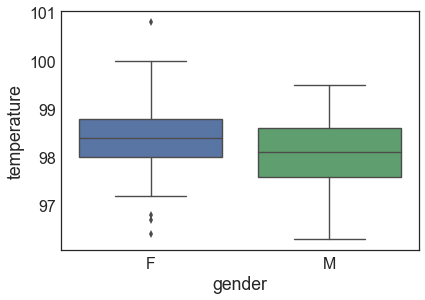

In [40]:
sns.boxplot('gender','temperature',data=df);

The boxplot visualizes the summary statistics of temperatures of male and female. It appears that temperature of females has relatively higher   average and a larger variance than that of males. Is this statistically correct?

## Is the distribution of temperature of female and male normal?

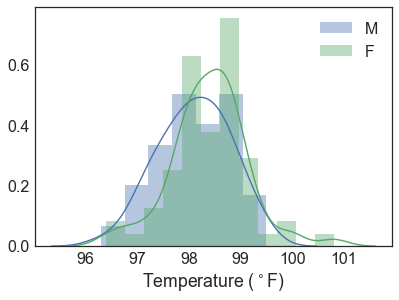

In [41]:
sns.distplot(males,norm_hist=True)
sns.distplot(females,norm_hist=True)
plt.legend(('M','F'),loc='best')
plt.xlabel('Temperature ($^\circ$F)');

The histogram of males temperature is more likely bell-shaped than that of females which has an obvious skewed right tail and is less symetric. It's hard to telll how normal the distribution is for the histogram.

goodness fit of females: 0.98


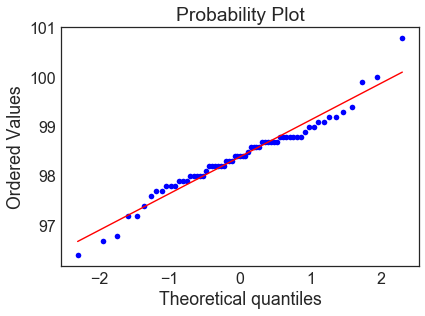

In [42]:
from scipy import stats
_,fit=stats.probplot(females,dist=stats.norm,plot=plt)
print('goodness fit of females:', '%.2f' %fit[2])

goodness fit of males: 1.00


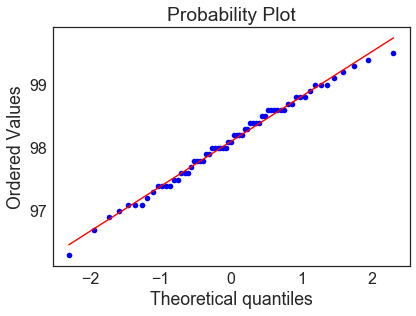

In [43]:
_,fit=stats.probplot(males,dist=stats.norm,plot=plt)
print('goodness fit of males:', '%.2f' %fit[2])

In [44]:
print('M: ',stats.normaltest(males))
print('F: ',stats.normaltest(females))

M:  NormaltestResult(statistic=0.8911999666950503, pvalue=0.6404399074569123)
F:  NormaltestResult(statistic=4.735438112908399, pvalue=0.09369419389856404)


The quantitle plot shows that males temperature has a better normal distribution approximation than that of females. The normaltest reaches the same conclusion. Since the p-values are all greater than 0.05, we consider that both males and females temperaturea distribution is approximately normal. 

## z-test
Since the sample size is 65 for both group, much larger than 30, we consider z-test for two samples. The null hypothesis is that female and male has the same average temperature. 

In [47]:
m_mean=males.mean()
m_std=males.std()
m_size=len(males)


f_mean=females.mean()
f_std=females.std()
f_size=len(females)



z = (m_mean-f_mean) / np.sqrt(((m_std ** 2)/ m_size) + ((f_std ** 2)/ f_size))
print('z score:', z)

p=stats.norm.sf(abs(z)) * 2
print('p value:', p)
print('\n')

print('average male temperature: ',m_mean)
print('male 95% CI: ',m_mean+np.array([-1,1])*1.96*m_std)
print('\n')


print('average female temperature: ',f_mean)
print('female 95% CI: ',f_mean+np.array([-1,1])*1.96*f_std)

z score: -2.285434538165274
p value: 0.02228736076067726


average male temperature:  98.1046153846154
male 95% CI:  [96.73505409 99.47417668]


average female temperature:  98.39384615384613
female 95% CI:  [96.93661016 99.85108215]


Since p value is smaller than 0.05, we reject the null hypothesis that females and males have the same average temperature. In fact the average temperature of female and males are significantly different.

The average male temperature is 98.1$^{\circ}$F. We are 95% confident that male temperature on average is between 96.74$^{\circ}$F and 99.47$^{\circ}$F. The average female tempereture is 98.39$^{\circ}$F and we are 95% confident that the true female average temperature is between 96.94$^{\circ}$F and 99.85$^{\circ}$F.

## t-test

We can perform a two-sample t-test.

In [48]:
stats.ttest_ind(males, females, equal_var = False)

Ttest_indResult(statistic=-2.285434538165611, pvalue=0.023938264182934196)

P-value of t-test is slightly greater than that of z-test, but in the large sample size case(65>30), it gives the same conclusion as that of z-test. It rejects the null hypotheis that males and females have the same mean body temperature. Instead the mean temperature is significantly different.

## Bootstrap hypothesis testing
We can performa bootstrap hypothesis testing.

In [49]:
diff=df.groupby('gender')['temperature'].mean().diff()[1]

bs_permutations_replicates = np.empty(10000)
for i in range(10000):
    permuted = np.random.permutation(np.concatenate((females,males)))
    f_permuted =permuted[:len(females)]
    m_permuted =permuted[len(males):]
    bs_permutations_replicates[i] = np.abs(np.mean(f_permuted) - np.mean(m_permuted))
    
bs_permutations_replicates_pval = np.sum(bs_permutations_replicates > abs(diff))/10000
print('p value :',bs_permutations_replicates_pval)


p value : 0.022


Bootstrap testing gives a p value  smaller than 0.05. We reject the null hypothesis.

# Conclusion
The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But this value is not statistically correct according to our inferential statistic analysis. 


According to the statistic analysis, with a frequentist approach, the mean temperature is 98.25$^{\circ}$F. A temperature lower than 96.82$^{\circ}$F and a temperature higher than 99.68$^{\circ}$F is considered abnormal if we define 'abnormal' as temperature out of the 95% confidence interval. 

We also find that there is a significant difference between males and females in normal temperature. The average male temperature is 98.1$^{\circ}$F. We are 95% confident that male temperature on average is between 96.74$^{\circ}$F and 99.47$^{\circ}$F. The average female tempereture is 98.39$^{\circ}$F and we are 95% confident that the true female average temperature is between 96.94$^{\circ}$F and 99.85$^{\circ}$F.